# Support Vector Machine Classifier (SVM) Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

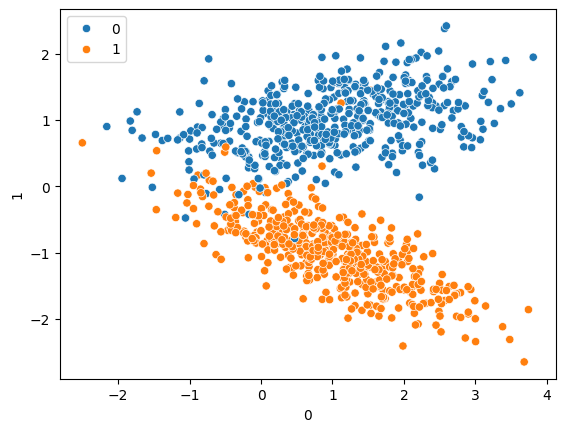

In [4]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [6]:
svc = SVC(kernel='linear')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
# Predictions 

y_pred = svc.predict(X_test)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred), "\n")
print("Classification Report:", classification_report(y_test,y_pred))

Confusion Matrix:  [[127   7]
 [  0 116]] 

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.95      0.97       134
           1       0.94      1.00      0.97       116

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [9]:
# RBF

rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
y_pred_rbf = rbf.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_rbf), "\n")
print("Classification Report:", classification_report(y_test,y_pred_rbf))

Confusion Matrix:  [[128   6]
 [  0 116]] 

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.96      0.98       134
           1       0.95      1.00      0.97       116

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [11]:
#polynomial

poly = SVC(kernel='poly')
poly.fit(X_train,y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
y_pred_poly = poly.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_poly), "\n")
print("Classification Report:", classification_report(y_test,y_pred_poly))

Confusion Matrix:  [[119  15]
 [  0 116]] 

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.89      0.94       134
           1       0.89      1.00      0.94       116

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250



In [13]:
# sigmoid
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)

,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
y_pred_sigmoid = sigmoid.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_sigmoid), "\n")
print("Classification Report:", classification_report(y_test,y_pred_sigmoid))

Confusion Matrix:  [[116  18]
 [  5 111]] 

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.87      0.91       134
           1       0.86      0.96      0.91       116

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [15]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
#defining parameter range
param_grid = {'C': [0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.0001],'kernel':['rbf','poly']}

In [16]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose= 3)

In [17]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.953 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.927 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.913 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.953 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.953 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'poly']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [18]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [19]:
y_pred_grid = grid.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_grid), "\n")
print("Classification Report:", classification_report(y_test,y_pred_grid))

Confusion Matrix:  [[127   7]
 [  0 116]] 

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.95      0.97       134
           1       0.94      1.00      0.97       116

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



# SVM Kernels Indepth Intution

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 -x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x]) 

In [21]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 -x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1]) 

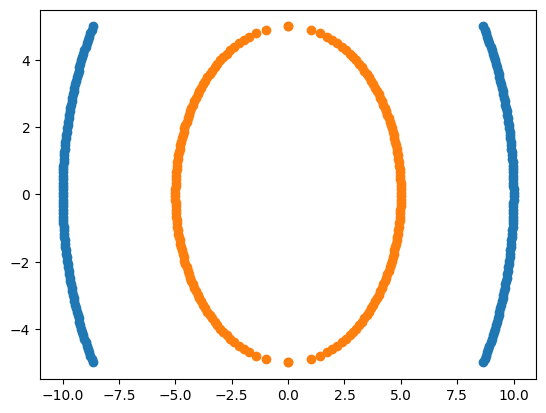

In [22]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [23]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns = ['X1','X2'])
df1['Y']=0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [24]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [25]:
# Independent and dependent feature
X = df.iloc[:,:2]
y= df.Y

In [26]:
#Split train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [27]:
# finidng components for Polynomianl Kernel

df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1']*df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [28]:
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']] 
y=  df['Y']

In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [30]:
#Split train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
import plotly.express as px

fig = px.scatter_3d(df, x = 'X1',y = 'X2',z='X1*X2' ,color='Y')

fig.show()

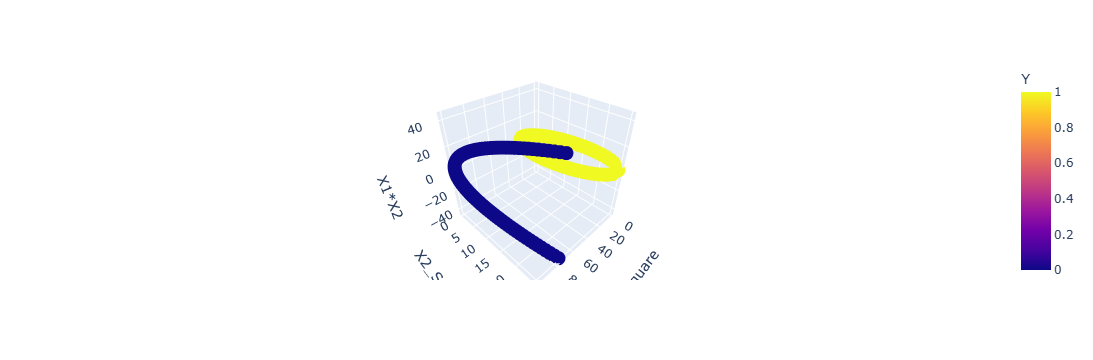

In [32]:
fig = px.scatter_3d(df, x = 'X1_Square',y = 'X2_Square',z='X1*X2' ,color='Y')

fig.show()

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier  = SVC(kernel="poly")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)


1.0

In [40]:
classifier  = SVC(kernel="rbf")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)


1.0

In [41]:
classifier  = SVC(kernel="sigmoid")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0